
<center>
    <h1><b>LIFE INSURANCE ASSESSMENT AND RISK PREDICTION</b></h1>
</center>

**Table of Contents:**
    

  1.&nbsp;[Problem Statement and Background Information](#section1)<br>
         
  2.&nbsp;[Packages and Data Loading](#section2)<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.1&nbsp;[Packages loading](#section21)<br>
       &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;2.2&nbsp;[Dataset Loading](#section22)<br>
       
  3.&nbsp;[Data Analysis and  pre-processing](#section3)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.1&nbsp;[Missing Value Analysis and Imputation](#section31)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.2&nbsp;[Output Variable Analysis](#section32)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.3&nbsp;[Handling Categorical variable through Factorization](#section33)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;3.4&nbsp;[Train-Test Split](#section34)<br>
      
  4.&nbsp;[Data modeling](#section4)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1&nbsp;[Logistic Regression](#section41)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.1&nbsp;[Building Logistic Regression Model](#section411)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.1.2&nbsp;[Model Evaluation](#section412)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2&nbsp;[Decision Trees](#section42)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.1&nbsp;[Building Decision Tree Model](#section421)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.2.2&nbsp;[Model Evaluation](#section422)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3[Random Forests](#section43)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3.1&nbsp;[Building Random Forest Model](#section431)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.3.2&nbsp;[Model Evaluation](#section432)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4[Cross Validation](#section44)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.1&nbsp;[Building Cross Validation Model](#section441)<br>
      &nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;4.4.2&nbsp;[Model Evaluation](#section442)<br>
      
      
  5.&nbsp;[Conclusions](#section5)<br>
  
  
      
      




   




<div id="section1"><b><h2>1. Problem Statement and Background Information</h2></b></div>


<h3><b>Background Information</b></h3><br>
In a one-click shopping world with on-demand everything, the life insurance application process is antiquated. Customers provide extensive information to identify risk classification and eligibility, including scheduling medical exams, a process that takes an average of 30 days.
The result? People are turned off. The company wants to make it quicker and less labor intensive for new and existing customers to get a quote while maintaining privacy boundaries.

<h3><b>Problem Statement</b></h3><br>
To develop a predictive model that accurately classifies risk using a more automated approach, and enable company and customers to opt of an insurance policy at the earliest.



<div id="section2"><b><h2>2. Packages and Dataset Loading</h2></b></div>

<div id="section21"><b><h3> 2.1 Loading Packages </h3></b></div>

In [0]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)
pd.set_option("max_info_columns",200)



<div id="section22"><b><h3> 2.2 Loading Dataset </h3></b></div>

In [0]:
insurance_original=pd.read_csv('https://raw.githubusercontent.com/insaid2018/Term-2/master/Projects/insurance_data.csv')
insurance_df=insurance_original.copy(deep=True)

In [0]:
insurance_df.head()

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
0,2,1,D3,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.028,12,1,0.0,3,NaN,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,NaN,0.598039,NaN,0.526786,4.0,112,2,1,1,3,2,2,1,NaN,3,2,3,3,240.0,3,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
1,5,1,A1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.000,1,3,0.0,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,NaN,0.084507,NaN,5.0,412,2,1,1,3,2,2,1,NaN,3,2,3,3,0.0,1,3,1,1,2,1,2,3,NaN,1,3,3,1,3,2,3,NaN,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4
2,6,1,E1,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.030,9,1,0.0,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,NaN,3,2,3,3,0.304348,NaN,0.225352,NaN,10.0,3,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
3,7,1,D4,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.042,9,1,0.0,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,NaN,3,2,3,3,0.420290,NaN,0.352113,NaN,0.0,350,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,2,2,3,NaN,1,3,3,1,3,2,3,NaN,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8
4,8,1,D2,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.027,9,1,0.0,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,NaN,3,2,3,2,0.463768,NaN,0.408451,NaN,NaN,162,2,2,1,3,2,2,2,NaN,3,2,3,3,NaN,1,3,1,1,2,1,2,3,NaN,2,2,3,1,3,2,3,NaN,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8


In [0]:
insurance_df.columns

Index(['Id', 'Product_Info_1', 'Product_Info_2', 'Product_Info_3',
       'Product_Info_4', 'Product_Info_5', 'Product_Info_6', 'Product_Info_7',
       'Ins_Age', 'Ht',
       ...
       'Medical_Keyword_40', 'Medical_Keyword_41', 'Medical_Keyword_42',
       'Medical_Keyword_43', 'Medical_Keyword_44', 'Medical_Keyword_45',
       'Medical_Keyword_46', 'Medical_Keyword_47', 'Medical_Keyword_48',
       'Response'],
      dtype='object', length=128)

In [0]:
def data_description():
    return insurance_df.describe()
data_description()

,Id,Product_Info_1,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response
count,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59362.000000,59381.000000,59381.000000,52602.000000,59381.000000,48527.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,33985.000000,59381.000000,59381.000000,59381.000000,59381.000000,30725.000000,25140.000000,40197.000000,17570.000000,50492.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,557.000000,59381.000000,59381.000000,59381.000000,59381.000000,14785.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,3801.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,1107.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000,59381.000000
mean,39507.211515,1.026355,24.415655,0.328952,2.006955,2.673599,1.043583,0.405567,0.707283,0.292587,0.469462,0.077582

In [0]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
Id                     59381 non-null int64
Product_Info_1         59381 non-null int64
Product_Info_2         59381 non-null object
Product_Info_3         59381 non-null int64
Product_Info_4         59381 non-null float64
Product_Info_5         59381 non-null int64
Product_Info_6         59381 non-null int64
Product_Info_7         59381 non-null int64
Ins_Age                59381 non-null float64
Ht                     59381 non-null float64
Wt                     59381 non-null float64
BMI                    59381 non-null float64
Employment_Info_1      59362 non-null float64
Employment_Info_2      59381 non-null int64
Employment_Info_3      59381 non-null int64
Employment_Info_4      52602 non-null float64
Employment_Info_5      59381 non-null int64
Employment_Info_6      48527 non-null float64
InsuredInfo_1          59381 non-null int64
InsuredInfo_2          59381 non-null

Product_Info_2 is a categorical column as the type is shown as object in info() and the column is not present in the describe()

**The insurance data can be broadly categorised in the following cateogaries(HIGH LEVEL CATEGORIES):**


1.   ID - 1
2.   PRODUCT INFO - 7
3.   APPLICANT'S BIO INFORMATION - AGE, HEIGHT, WEIGHT -3 
4.   APPLICANT'S EMPLOYMENT INFO - 6
5.   APPLICANT'S INSURED INFO - 7
6.   APPLICANT'S INSURANCE INFO - 9
7.   APPLICANT'S FAMILY HISTORY - 5
8.  APPLICANT'S MEDICAL HISTORY - 41
9.  APPLICANT'S MEDICAL_KEYWORD - 48
10. RESPONSE - 1


In [0]:
insurance_df['Product_Info_2'].unique()

array(['D3', 'A1', 'E1', 'D4', 'D2', 'A8', 'A2', 'D1', 'A7', 'A6', 'A3',
       'A5', 'C4', 'C1', 'B2', 'C3', 'C2', 'A4', 'B1'], dtype=object)

In [0]:
def variable_categorization():
        columns=insurance_df.columns
        insur=insurance_df.head(100)
        for col in columns:
            print("Column:{0}".format(col))
            print("Values:{0}".format(insur[col].unique()))
            print("Count of null values:{}".format(insur[col].isnull().sum()))
            print("Count:{0}\n".format(len(insur[col].unique())))
variable_categorization()

Column:Id
Values:[  2   5   6   7   8  10  11  14  15  16  17  18  19  20  22  23  24  25
  26  27  29  31  32  33  34  35  37  39  40  41  42  44  46  47  49  52
  53  56  57  58  60  61  64  65  67  68  70  71  72  73  74  75  76  77
  78  79  80  81  85  87  88  91  93  94  95  96  97  99 101 102 103 104
 106 107 108 109 110 111 112 113 114 116 117 118 120 121 122 123 125 126
 128 129 130 131 132 134 135 136 137 138]
Count of null values:0
Count:100

Column:Product_Info_1
Values:[1 2]
Count of null values:0
Count:2

Column:Product_Info_2
Values:['D3' 'A1' 'E1' 'D4' 'D2' 'A8' 'A2' 'D1' 'A7' 'A6' 'A3' 'A5' 'C4']
Count of null values:0
Count:13

Column:Product_Info_3
Values:[10 26 21 31 29 37]
Count of null values:0
Count:6

Column:Product_Info_4
Values:[0.07692308 0.48717949 0.23076923 0.16619385 0.12820513 0.1025641
 0.         0.38461538 0.43589744 1.         0.17948718 0.02564103
 0.33333333 0.28205128 0.74358974 0.69230769 0.61538461 0.15384615
 0.35897436]
Count of null values:0


In [0]:
insurance_df.shape

(59381, 128)

<div id="section3"><b><h2> 3. Data Analysis and pre-processing  </h2></b></div>

<div id="section31"><b><h3> 3.1 Missing Value Analysis and Imputation </h3></b></div>

In [0]:
def missing_values():
    #Calculating missing values
    
    missing_count=insurance_df.isnull().sum().sort_values(ascending=False)
    total_values=insurance_df.isnull().count().sort_values(ascending=False)
    
    percentage_missing=missing_count/total_values *100
    percentage_missing.sort_values(ascending=False)
    miss=pd.concat([missing_count, total_values,percentage_missing ], axis=1, keys=['Missing Count','Total Values', 'Percent Missing'])
  
    return miss
miss_df=missing_values()
miss_df



/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:9: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  if __name__ == '__main__':


,Missing Count,Total Values,Percent Missing
BMI,0,59381,0.000000
Employment_Info_1,19,59381,0.031997
Employment_Info_2,0,59381,0.000000
Employment_Info_3,0,59381,0.000000
Employment_Info_4,6779,59381,11.416110
Employment_Info_5,0,59381,0.000000
Employment_Info_6,10854,59381,18.278574
Family_Hist_1,0,59381,0.000000
Family_Hist_2,28656,59381,48.257860
Family_Hist_3,34241,59381,57.663226


<b>The data shows missing values but the percentages are very less and since its insurance data it could that the fields were left as optional or applicants didnot fill it. So missing value replacement is not necessary</b>

In [0]:
miss_df=miss_df.reset_index()


In [0]:
miss_df

,index,Missing Count,Total Values,Percent Missing
0,BMI,0,59381,0.000000
1,Employment_Info_1,19,59381,0.031997
2,Employment_Info_2,0,59381,0.000000
3,Employment_Info_3,0,59381,0.000000
4,Employment_Info_4,6779,59381,11.416110
5,Employment_Info_5,0,59381,0.000000
6,Employment_Info_6,10854,59381,18.278574
7,Family_Hist_1,0,59381,0.000000
8,Family_Hist_2,28656,59381,48.257860
9,Family_Hist_3,34241,59381,57.663226


In [ ]:
missing_indicator=-1000
insurance_df.fillna(missing_indicator, inplace=True)

<div id="section32"><b><h3> 3.2 Output Variable Analysis </h3></b></div>

In [ ]:
def target_classes() :
    target_values=insurance_df['Response'].unique()
    target_values.sort()
    return target_values

target_values=target_classes()

print("The possible target values/classes are:{0}".format(target_values))


print("The possible target values are just 8(categorical) and not numerical continous it means we are looking at a classification problem")


In [ ]:
insurance_df['Response'].value_counts()

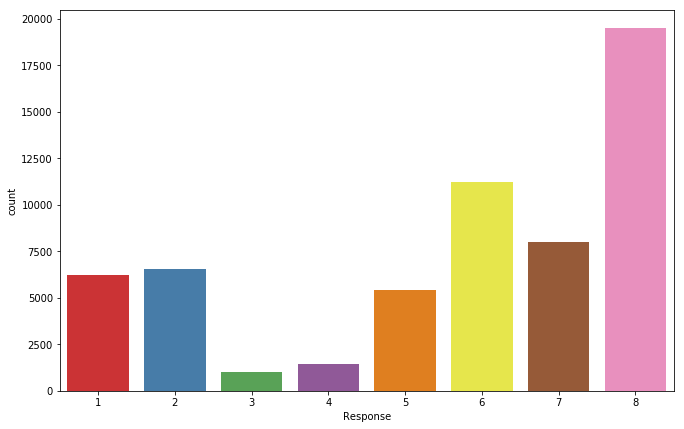

In [0]:

def countPlot_TargetVariable():
    # set plot figure size
    # your code to create the countplot
    plt.figure(figsize=(11,7))
    sns.countplot(x='Response',data=insurance_df,palette='Set1')

countPlot_TargetVariable()

<b><h3>The target variable is showing imbalanced classification. </h3></b>

In [0]:
insurance_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59381 entries, 0 to 59380
Data columns (total 128 columns):
Id                     59381 non-null int64
Product_Info_1         59381 non-null int64
Product_Info_2         59381 non-null object
Product_Info_3         59381 non-null int64
Product_Info_4         59381 non-null float64
Product_Info_5         59381 non-null int64
Product_Info_6         59381 non-null int64
Product_Info_7         59381 non-null int64
Ins_Age                59381 non-null float64
Ht                     59381 non-null float64
Wt                     59381 non-null float64
BMI                    59381 non-null float64
Employment_Info_1      59362 non-null float64
Employment_Info_2      59381 non-null int64
Employment_Info_3      59381 non-null int64
Employment_Info_4      52602 non-null float64
Employment_Info_5      59381 non-null int64
Employment_Info_6      48527 non-null float64
InsuredInfo_1          59381 non-null int64
InsuredInfo_2          59381 non-null

<div id="section33"><b><h3> 3.3 Handling Categorical Variable through Factorization </h3></b></div><br>
Choosing factorzation over dummification as there are a lot of catogaries and dummification will lead to creation of a lot columns whereas factorization is better as it commons out 

In [0]:


def factorization():
  
  #Creating new variables
  insurance_df['Product_Info_2_char'] = insurance_df.Product_Info_2.astype(str).str[0]
  insurance_df['Product_Info_2_num'] = insurance_df.Product_Info_2.astype(str).str[1]
  
  #facorization of categorical variable
  #https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.factorize.html

  insurance_df['Product_Info_2'] = pd.factorize(insurance_df['Product_Info_2'])[0]
  insurance_df['Product_Info_2_char'] = pd.factorize(insurance_df['Product_Info_2_char'])[0]
  insurance_df['Product_Info_2_num'] = pd.factorize(insurance_df['Product_Info_2_num'])[0]

factorization()

In [0]:
insurance_df.head(50)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Response,Product_Info_2_char,Product_Info_2_num
0,2,1,0,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.02800,12,1,0.000,3,-1000.0000,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,-1000.000000,0.598039,-1000.000000,0.526786,4.0,112,2,1,1,3,2,2,1,-1000.0,3,2,3,3,240.0,3,3,1,1,2,1,2,3,-1000.0,1,3,3,1,3,2,3,-1000.0,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,0
1,5,1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.00000,1,3,0.000,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,-1000.000000,0.084507,-1000.000000,5.0,412,2,1,1,3,2,2,1,-1000.0,3,2,3,3,0.0,1,3,1,1,2,1,2,3,-1000.0,1,3,3,1,3,2,3,-1000.0,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1,1
2,6,1,2,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.03000,9,1,0.000,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,-1000.000000,3,2,3,3,0.304348,-1000.000000,0.225352,-1000.000000,10.0,3,2,2,1,3,2,2,2,-1000.0,3,2,3,3,-1000.0,1,3,1,1,2,1,2,3,-1000.0,2,2,3,1,3,2,3,-1000.0,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,2,1
3,7,1,3,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.04200,9,1,0.000,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,-1000.000000,3,2,3,3,0.420290,-1000.000000,0.352113,-1000.000000,0.0,350,2,2,1,3,2,2,2,-1000.0,3,2,3,3,-1000.0,1,3,1,1,2,2,2,3,-1000.0,1,3,3,1,3,2,3,-1000.0,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,8,0,2
4,8,1,4,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.02700,9,1,0.000,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,-1000.000000,3,2,3,2,0.463768,-1000.000000,0.408451,-1000.00000

<div id="section34"><b><h3> 3.4 Train-Test Split </h3></b></div>

In [0]:
X = pd.DataFrame()
def feature_selection2(): #All columns except the predictor column in sales only few were selected
    # write your code to create a dataframe of dependent variables excluding 'y' variable
    X = insurance_df.loc[:,insurance_df.columns != 'Response']
    return X
X = feature_selection2()

In [0]:
X.head(50)

,Id,Product_Info_1,Product_Info_2,Product_Info_3,Product_Info_4,Product_Info_5,Product_Info_6,Product_Info_7,Ins_Age,Ht,Wt,BMI,Employment_Info_1,Employment_Info_2,Employment_Info_3,Employment_Info_4,Employment_Info_5,Employment_Info_6,InsuredInfo_1,InsuredInfo_2,InsuredInfo_3,InsuredInfo_4,InsuredInfo_5,InsuredInfo_6,InsuredInfo_7,Insurance_History_1,Insurance_History_2,Insurance_History_3,Insurance_History_4,Insurance_History_5,Insurance_History_7,Insurance_History_8,Insurance_History_9,Family_Hist_1,Family_Hist_2,Family_Hist_3,Family_Hist_4,Family_Hist_5,Medical_History_1,Medical_History_2,Medical_History_3,Medical_History_4,Medical_History_5,Medical_History_6,Medical_History_7,Medical_History_8,Medical_History_9,Medical_History_10,Medical_History_11,Medical_History_12,Medical_History_13,Medical_History_14,Medical_History_15,Medical_History_16,Medical_History_17,Medical_History_18,Medical_History_19,Medical_History_20,Medical_History_21,Medical_History_22,Medical_History_23,Medical_History_24,Medical_History_25,Medical_History_26,Medical_History_27,Medical_History_28,Medical_History_29,Medical_History_30,Medical_History_31,Medical_History_32,Medical_History_33,Medical_History_34,Medical_History_35,Medical_History_36,Medical_History_37,Medical_History_38,Medical_History_39,Medical_History_40,Medical_History_41,Medical_Keyword_1,Medical_Keyword_2,Medical_Keyword_3,Medical_Keyword_4,Medical_Keyword_5,Medical_Keyword_6,Medical_Keyword_7,Medical_Keyword_8,Medical_Keyword_9,Medical_Keyword_10,Medical_Keyword_11,Medical_Keyword_12,Medical_Keyword_13,Medical_Keyword_14,Medical_Keyword_15,Medical_Keyword_16,Medical_Keyword_17,Medical_Keyword_18,Medical_Keyword_19,Medical_Keyword_20,Medical_Keyword_21,Medical_Keyword_22,Medical_Keyword_23,Medical_Keyword_24,Medical_Keyword_25,Medical_Keyword_26,Medical_Keyword_27,Medical_Keyword_28,Medical_Keyword_29,Medical_Keyword_30,Medical_Keyword_31,Medical_Keyword_32,Medical_Keyword_33,Medical_Keyword_34,Medical_Keyword_35,Medical_Keyword_36,Medical_Keyword_37,Medical_Keyword_38,Medical_Keyword_39,Medical_Keyword_40,Medical_Keyword_41,Medical_Keyword_42,Medical_Keyword_43,Medical_Keyword_44,Medical_Keyword_45,Medical_Keyword_46,Medical_Keyword_47,Medical_Keyword_48,Product_Info_2_char,Product_Info_2_num
0,2,1,0,10,0.076923,2,1,1,0.641791,0.581818,0.148536,0.323008,0.02800,12,1,0.000,3,-1000.0000,1,2,6,3,1,2,1,1,1,3,1,0.000667,1,1,2,2,-1000.000000,0.598039,-1000.000000,0.526786,4.0,112,2,1,1,3,2,2,1,-1000.0,3,2,3,3,240.0,3,3,1,1,2,1,2,3,-1000.0,1,3,3,1,3,2,3,-1000.0,1,3,1,2,2,1,3,3,3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,5,1,1,26,0.076923,2,3,1,0.059701,0.600000,0.131799,0.272288,0.00000,1,3,0.000,2,0.0018,1,2,6,3,1,2,1,2,1,3,1,0.000133,1,3,2,2,0.188406,-1000.000000,0.084507,-1000.000000,5.0,412,2,1,1,3,2,2,1,-1000.0,3,2,3,3,0.0,1,3,1,1,2,1,2,3,-1000.0,1,3,3,1,3,2,3,-1000.0,3,1,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1
2,6,1,2,26,0.076923,2,3,1,0.029851,0.745455,0.288703,0.428780,0.03000,9,1,0.000,2,0.0300,1,2,8,3,1,1,1,2,1,1,3,-1000.000000,3,2,3,3,0.304348,-1000.000000,0.225352,-1000.000000,10.0,3,2,2,1,3,2,2,2,-1000.0,3,2,3,3,-1000.0,1,3,1,1,2,1,2,3,-1000.0,2,2,3,1,3,2,3,-1000.0,3,3,1,3,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2,1
3,7,1,3,10,0.487179,2,3,1,0.164179,0.672727,0.205021,0.352438,0.04200,9,1,0.000,3,0.2000,2,2,8,3,1,2,1,2,1,1,3,-1000.000000,3,2,3,3,0.420290,-1000.000000,0.352113,-1000.000000,0.0,350,2,2,1,3,2,2,2,-1000.0,3,2,3,3,-1000.0,1,3,1,1,2,2,2,3,-1000.0,1,3,3,1,3,2,3,-1000.0,3,3,1,2,2,1,3,3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,2
4,8,1,4,26,0.230769,2,3,1,0.417910,0.654545,0.234310,0.424046,0.02700,9,1,0.000,2,0.0500,1,2,6,3,1,2,1,2,1,1,3,-1000.000000,3,2,3,2,0.463768,-1000.000000,0.408451,-1000.000000,-1000.0,162,2,2

In [0]:
y = pd.DataFrame()
def target_variable():
    # write your code to create a dataframe which consists only of dependent variable
    y=insurance_df['Response']
    return y
y = target_variable()

In [0]:
from sklearn.model_selection import train_test_split
def df_split():
    
    return train_test_split(X, y , test_size=0.25, random_state=1)# train test split using train_test_split of 75:25 and random state=1
X_train, X_test, y_train, y_test = df_split()

In [0]:
def shape_check_train():
    print(X_train.shape)
    print(y_train.shape)
shape_check_train()

(44535, 129)
(44535,)


In [0]:
def shape_check_test():
    print(X_test.shape)
    print(y_test.shape)
shape_check_test()

(14846, 129)
(14846,)


<div id="section4"><b><h2> 4. Data Modeling </h2></b></div>

<div id="section41"><b><h3> 4.1 Logistic Regression </h3></b></div>

<div id="section411"><b><h3> 4.1.1 Building Logistic Regression Model </h3></b></div>

In [0]:
from sklearn.linear_model import LogisticRegression
def model_initialization():
    # initiate the logistic regression model to new variable logreg
    logreg=LogisticRegression(multi_class='multinomial', solver='newton-cg')
    return logreg
logreg = model_initialization()

In [0]:
def model_fit():
    # fit the X_train and y_train
    # We don't expect any return from your side.
    logreg.fit(X_train, y_train)
model_fit()    

/usr/local/lib/python3.6/dist-packages/sklearn/utils/optimize.py:203: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  "number of iterations.", ConvergenceWarning)


In [0]:
y_pred_test = pd.DataFrame()
def logistic_prediction_test():
    # create the model prediction on X_test data using the above created dataframe
    y_pred_test=logreg.predict(X_test)
    return y_pred_test
y_pred_test = logistic_prediction_test()

<div id="section412"><b><h3> 4.1.2 Model Evaluation </h3></b></div>

In [0]:
from sklearn.metrics import accuracy_score
def logistic_accuracy_score():
    #Calculate and print the accuracy score
    print("The accuracy of test_prediction w.r.t actual_test is :",accuracy_score(y_test,y_pred_test))
    
logistic_accuracy_score()

The accuracy of test_prediction w.r.t actual_test is : 0.4187659975751044


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

def model_evaluation():
    # provide confusion matrix index name as['Actual No_Deposit','Actual Deposit']
    # provide confusion matrix index name as['Predicted No_Deposit','Predicted Deposit']
    confusion_matrix.index=['Act 1','Act 2','Act 3','Act 4','Act 5','Act 6', 'Act 7','Act 8']
    confusion_matrix.columns=['Pred 1', 'Pred 2','Pred 3','Pred 4','Pred 5','Pred 6','Pred 7','Pred 8']
    print(confusion_matrix)
model_evaluation()

       Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8
Act 1     357     170       0       0       8     328     157     582
Act 2     234     224       0       2       6     369     148     653
Act 3      34      10       0       2       1      89      11     113
Act 4      22       5       0       2       0      89       7     234
Act 5     110      71       0       4      10     252     158     756
Act 6     156     137       0       7       4     783     252    1432
Act 7     112      48       0       3       8     244     392    1189
Act 8      49      20       0       5       2     265      71    4449


<div id="section42"><b><h3> 4.2 Decision Trees </h3></b></div>

<div id="section421"><b><h3> 4.2.1 Buildling Decision Tree Model </h3></b></div>

In [0]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

decision_tree_classifier = DecisionTreeClassifier(random_state = 0)


tree_para = [{'criterion':['gini','entropy'],'max_depth': range(2,60),
                             'max_features': ['sqrt', 'log2', None] }]
                            
                            

grid_search = GridSearchCV(decision_tree_classifier,tree_para, cv=10, refit='AUC')
grid_search.fit(X_train, y_train)

GridSearchCV(cv=10, error_score='raise-deprecating',
       estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=0,
            splitter='best'),
       fit_params=None, iid='warn', n_jobs=None,
       param_grid=[{'criterion': ['gini', 'entropy'], 'max_depth': range(2, 60), 'max_features': ['sqrt', 'log2', None]}],
       pre_dispatch='2*n_jobs', refit='AUC', return_train_score='warn',
       scoring=None, verbose=0)

In [0]:
y_pred_test1 = grid_search.predict(X_test)

<div id="section422"><b><h3> 4.2.2 Model Evaluation </h3></b></div>

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test1))

Accuracy score for test data is: 0.555772598679779


In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix2 = pd.DataFrame(confusion_matrix(y_test, y_pred_test1))

def model_evaluation():
    # provide confusion matrix index name as['Actual No_Deposit','Actual Deposit']
    # provide confusion matrix index name as['Predicted No_Deposit','Predicted Deposit']
    confusion_matrix2.index=['Act 1','Act 2','Act 3','Act 4','Act 5','Act 6', 'Act 7','Act 8']
    confusion_matrix2.columns=['Pred 1', 'Pred 2','Pred 3','Pred 4','Pred 5','Pred 6','Pred 7','Pred 8']
    print(confusion_matrix2)
model_evaluation()

       Pred 1  Pred 2  Pred 3  Pred 4  Pred 5  Pred 6  Pred 7  Pred 8
Act 1     171     225      14      75     147     296     305     369
Act 2     147     330      15      60     180     313     228     363
Act 3       8      11      56      95      27      46       7      10
Act 4       5       3       2     258       0      24      14      53
Act 5      62     108       1       0     691     251     112     136
Act 6      90      86       0       7     111    1313     550     614
Act 7      48      21       0       0       6     171     959     791
Act 8       7      28       0       3      10     114     226    4473


<div id="section43"><b><h3> 4.3 Random Forest </h3></b></div>

<div id="section431"><b><h3> 4.3.1 Building Random Forest Model </h3></b></div>

In [0]:
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 0)

model.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
model1 = RandomForestClassifier(random_state = 0,
                                n_estimators = 15,
                                min_samples_split = 2,
                                min_samples_leaf = 1)

model1.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=15, n_jobs=None,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [0]:
y_pred_train2 = model.predict(X_train)
y_pred_train3 = model1.predict(X_train)

In [0]:
y_pred_test2 = model.predict(X_test)                                                           # make predictions on the testing set
y_pred_test3 = model1.predict(X_test)

<div id="section432"><b><h3> 4.3.2 Model Evaluation </h3></b></div>

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score for test data using the model without parameter specification:', accuracy_score(y_test,y_pred_test2))
print('Accuracy score for test data using the model with parameter specification:', accuracy_score(y_test,y_pred_test3))

Accuracy score for test data using the model without parameter specification: 0.5013471642193184
Accuracy score for test data using the model with parameter specification: 0.5205442543446046


<div id="section44"><b><h3> 4.4 Cross Validation </h3></b></div>

<div id="section441"><b><h3> 4.4.1 Buildling Cross Validation Model </h3></b></div>

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint

print(sp_randint(2,5))

In [0]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint as sp_randint
# parameters for GridSearchCV
# specify parameters and distributions to sample from
param_dist = {"max_depth": [50],
              "min_samples_split": [1000],
              "min_samples_leaf": [500],
              "bootstrap": [True, False],
              "n_estimators": [100, 400, 700, 1000, 1500],
              "criterion" : ["gini", "entropy"],
              'max_features': ['sqrt', 'log2', None]
             }
# run randomized search
n_iter_search = 50
random_search = RandomizedSearchCV(model, param_distributions = param_dist,
                                   n_iter = n_iter_search,
                                   n_jobs = -1)

In [0]:
random_search.fit(X_train, y_train)

/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_split.py:2053: FutureWarning: You should specify a value for 'cv' instead of relying on the default value. The default value will change from 3 to 5 in version 0.22.
  warnings.warn(CV_WARNING, FutureWarning)


In [0]:
y_pred_test3 = random_search.predict(X_test)

<div id="section442"><b><h3> 4.4.2 Model Evaluation </h3></b></div>

In [0]:
from sklearn.metrics import accuracy_score
print('Accuracy score on test data with RandomizedSearchCV is:', accuracy_score(y_test,y_pred_test3))

In [0]:
from sklearn.metrics import confusion_matrix
confusion_matrix3 = pd.DataFrame(confusion_matrix(y_test, y_pred_test3))

def model_evaluation():
    # provide confusion matrix index name as['Actual No_Deposit','Actual Deposit']
    # provide confusion matrix index name as['Predicted No_Deposit','Predicted Deposit']
    confusion_matrix3.index=['Act 1','Act 2','Act 3','Act 4','Act 5','Act 6', 'Act 7','Act 8']
    confusion_matrix3.columns=['Pred 1', 'Pred 2','Pred 3','Pred 4','Pred 5','Pred 6','Pred 7','Pred 8']
    print(confusion_matrix3)
model_evaluation()

<div id="section5"><b><h2> 5. Conclusion </h2></b></div>

The accuracies of the models are listed below:

* __Logistic Regression: 0.418__
* __Decision Tree: 0.555__
* __Random Forest: 0.501__ _(Without Parameters)_ __0.520__ _(With Parameters)
* __Cross Validation: 0.512__

Decision Tree has the highest accuracy for this problem statement.